# **DoDiligence: AI Stock Predictor**
###### COMP3359 Group 33 Project
###### Tse I Ching Eugene (UID: 3035608215)
###### Ningoo Siddhant Darpan (UID: 3035577973)

**Before You Start:** When using this notebook, please always run it from the beginning, as this is a user input dependent application.

##Step 1: Getting ready
In this section, we set up DoDiligence by importing libraries and retrieving yesterday's date.

First, please run the following cell to import the required libraries.

In [22]:
#IMPORT LIBRARIES
from datetime import datetime, timedelta
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from numpy import array


Next, we retrieve yesterday's date (the day prior to running the program).



In [23]:
#Get the date before the day of running the program
yesterday = (datetime.now() - timedelta(days = 1)).strftime('%Y-%m-%d')
print(yesterday)

2021-04-23


##Step 2: Choosing and retrieving stock data
In this section, you will provide specifications about the stock and time horizon of prediction. Accordingly, DoDiligence will retrieve the data and can even visualise it.

We will ask you to **input a NASDAQ stock** of your choice, and the **time horizon (number of days into the future, starting from today)** that you would like DoDiligence to predict the stock's price over.

Given your specifications, DoDiligence will proceed to retrieve the corresponding data from Yahoo Finance through the Pandas datareader.


In [24]:
#Get the stock that needs to be predicted
print("Please input the NASDAQ stock TICKER for the stock you would like to predict:")
stockpick = input()
#Get the time horizon that the user would like to predict over
print("Please input time horizon you'd like DD to predict over")
days = int(input())
#Retrieve data from Yahoo Finance through Pandas datareader
df = web.DataReader(stockpick, data_source='yahoo', start='2012-01-01', end= yesterday)


Please input the NASDAQ stock TICKER for the stock you would like to predict:
TSLA
Please input time horizon you'd like DD to predict over
30


If you wish to view the data retrieved here, you may run the following cell. However, not all of the data here will be used by DoDiligence - the program only needs to use data from the 'Close' column.

In [25]:
df[:]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900000,5.530000,5.788000,5.616000,4640500.0,5.616000
2012-01-04,5.734000,5.500000,5.642000,5.542000,3150500.0,5.542000
2012-01-05,5.586000,5.370000,5.552000,5.424000,5027500.0,5.424000
2012-01-06,5.558000,5.282000,5.440000,5.382000,4931500.0,5.382000
2012-01-09,5.498000,5.224000,5.400000,5.450000,4485000.0,5.450000
...,...,...,...,...,...,...
2021-04-19,725.400024,691.799988,719.599976,714.630005,39597000.0,714.630005
2021-04-20,737.250000,710.690002,717.419983,718.989990,35550500.0,718.989990
2021-04-21,744.840027,698.000000,704.770020,744.119995,31215500.0,744.119995


If you wish for DoDiligence to provide a visualisation of your chosen stock's closing price history, please run the following cell.

Text(0, 0.5, 'Close Price USD')

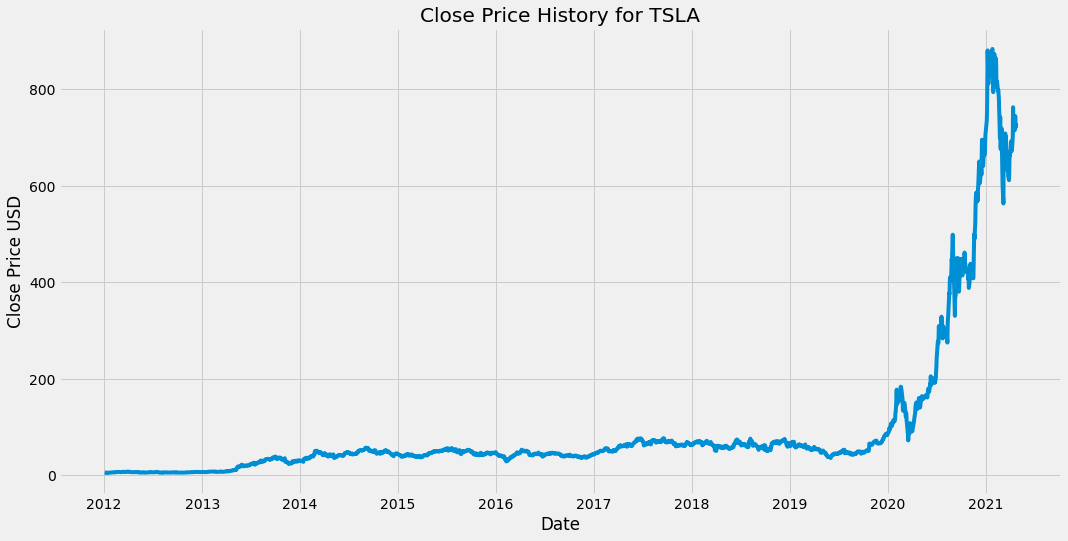

In [26]:
#Provide a graph
plt.figure(figsize=(16,8))
plt.title("Close Price History for " + stockpick)
plt.plot(df['Close'])
plt.xlabel("Date")
plt.ylabel("Close Price USD")

##Step 3: Data preparation
In this section, DoDiligence filters useful data, performs scaling, splits the data for training, and performs other conversions/reshaping in order to prepare the data for LSTM.

As previously explained, not all of the retrieved data is useful for our program. DoDiligence **filters out all columns except for 'Close'**, by creating a new dataframe 'data' that only contains 'Close'. This is subsequently converted to a numpy array.

Furthermore, we get the number of rows to train the model on.

In [27]:
#From the dataset obtained through web reader, filter out and only use the data that is resourceful
data = df.filter(['Close'])
dataset = data.values
trainin_data_length = math.ceil(len(dataset)*0.8)

To normalize the range of stock prices, DoDiligence needs to scale the data.



In [28]:
#Normalization of range of stock prices 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

We create the **scaled training data set** by grouping the data as per their train/test size. The data is split into x_train and y_train data sets.

These data sets are then converted to numpy arrays, to enable other functions.

Our model (in the next section) will only take a 3D array – hence, DoDiligence needs to reshape the data.

In [29]:
#Group the data as per their train/test size
train_data = scaled_data[0:trainin_data_length , :]
#Append the corresponding data to the train set
x_train = []
y_train = []
for i in range (60, len(train_data)):
  x_train.append(train_data[i-60 : i, 0])
  y_train.append(train_data[i , 0])

In [30]:
#Convert to numpy array so that other functions can be done
x_train, y_train = np.array(x_train), np.array(y_train)

In [31]:
#The model would only take a 3D array, hence reshaping is required
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))


##Step 4: Setting up the LSTM model

In this section, we build, compile and train the LSTM model. The testing data set is created, followed by more conversion/reshaping. The predicted values are generated and compared to the actual values.

The following cell **builds the layers to the LSTM model**.

In [32]:
#Building the layers to the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

The model is then **compiled and trained/fitted to the data set**.

In [33]:
#Compiling and fitting the model to the dataset
model.compile(optimizer = 'adam', loss = 'mse')
model.fit(x_train, y_train, batch_size = 64, epochs = 50)

Epoch 1/50
29/29 [==============================] - 6s 69ms/step - loss: 7.1603e-04
Epoch 2/50
29/29 [==============================] - 2s 70ms/step - loss: 3.7326e-05
Epoch 3/50
29/29 [==============================] - 2s 68ms/step - loss: 1.3850e-05
Epoch 4/50
29/29 [==============================] - 2s 70ms/step - loss: 1.4035e-05
Epoch 5/50
29/29 [==============================] - 2s 69ms/step - loss: 1.2764e-05
Epoch 6/50
29/29 [==============================] - 2s 70ms/step - loss: 1.3372e-05
Epoch 7/50
29/29 [==============================] - 2s 71ms/step - loss: 1.1837e-05
Epoch 8/50
29/29 [==============================] - 2s 70ms/step - loss: 1.4475e-05
Epoch 9/50
29/29 [==============================] - 2s 70ms/step - loss: 1.2797e-05
Epoch 10/50
29/29 [==============================] - 2s 70ms/step - loss: 1.2703e-05
Epoch 11/50
29/29 [==============================] - 2s 69ms/step - loss: 1.1662e-05
Epoch 12/50
29/29 [==============================] - 2s 69ms/step - loss: 

We will create a **testing data set**, and append the corresponding data set to the correct arrays. The x_test and y_test data sets are created.

In [34]:
#Append the corresponding dataset to the correct arrays
test_data = scaled_data[trainin_data_length-60 : , :]
x_test = []
y_test = dataset[trainin_data_length: , :]
for i in range (60, len(test_data)):
  x_test.append(test_data[i-60 : i, 0]) 

Before proceeding to LSTM model prediction, the data is then converted to numpy array and reshaped.

In [35]:
#Reshape the array to proceed to LSTM model prediction
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

We get the **predicted stock price values** and the **root mean squared error** in the following cells.

In [36]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [37]:
print("Root Mean Square Error amounts to : ")
rmse = np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

Root Mean Square Error amounts to : 


47.7972013618435

To compare our model's predictions with the actual stock price values, we plot and visualise the data here.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


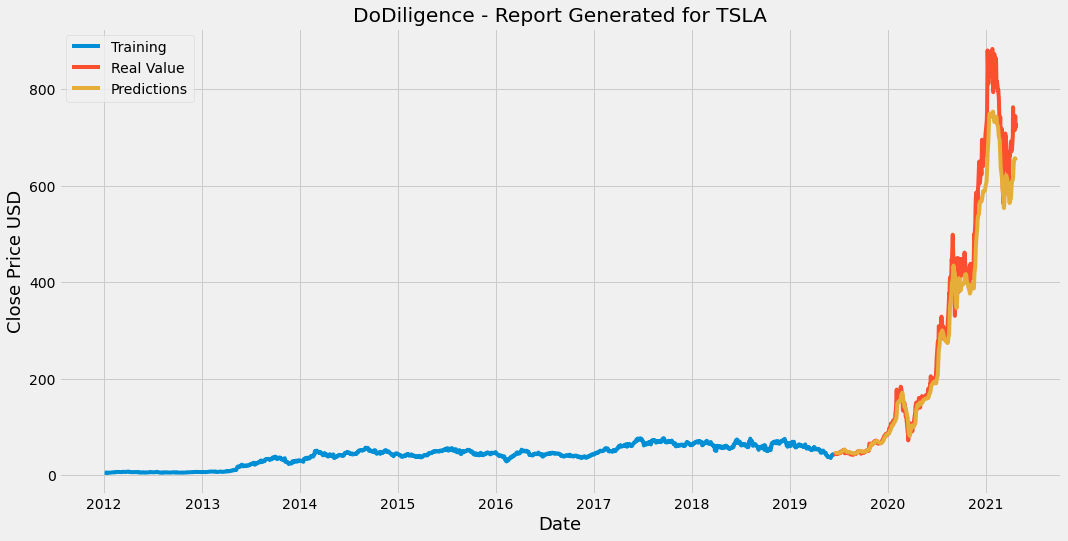

In [38]:
#Comparing the model's predictions with actual values
train = data[:trainin_data_length]
valid = data[trainin_data_length :]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('DoDiligence - Report Generated for ' + stockpick)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Training', 'Real Value', 'Predictions'], loc = 'upper left')
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


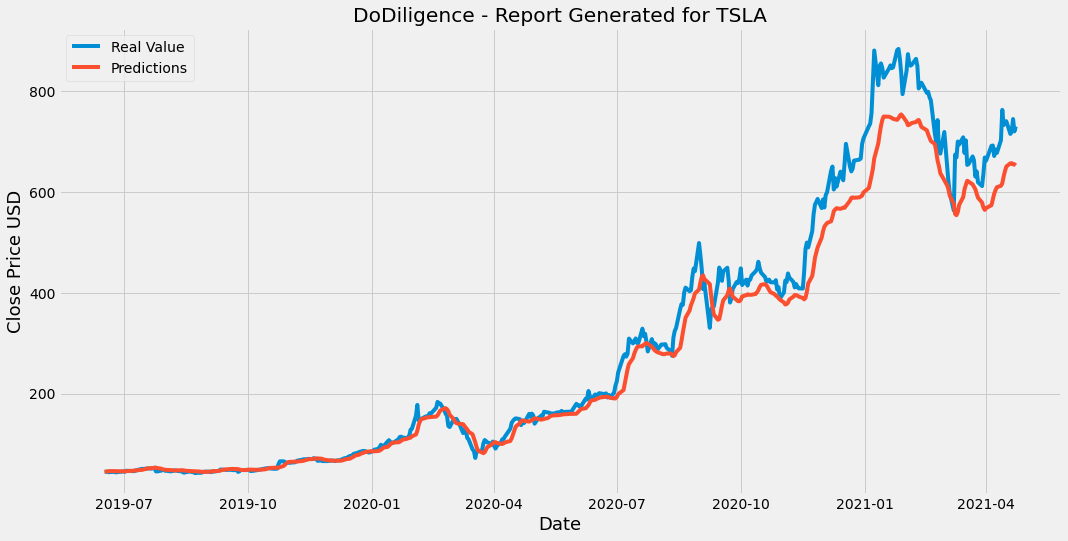

In [39]:
#Comparing the model's predictions with actual values (zoomed in)
valid = data[trainin_data_length :]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('DoDiligence - Report Generated for ' + stockpick)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Real Value', 'Predictions'], loc = 'upper left')
plt.show()

##Step 5: Predicting over the time horizon

In this section, the prediction of stock price over the user's specified time horizon will be performed. DoDiligence will provide the predicted price of the *xth* day (*x* being the time horizon previously indicated by the user). Additionally, the predicted price points over the time period can also be plotted out.

We first reshape the data here to prepare for prediction.

In [40]:
lhd = len(test_data) - 100
x_input=test_data[lhd:].reshape(1,-1)
final_input=list(x_input)
final_input=final_input[0].tolist()

**Prediction is performed here using the LSTM model**, and the user can now view the predicted price for the *xth* day.

In [41]:
# prediction for next x days
pred_output=[]
n_steps=100
i=0
while(i<days):
    
    if(len(final_input)>100):
        x_input = np.array(final_input[1:])
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        pred_unfinished = model.predict(x_input)
        final_input.extend(pred_unfinished[0].tolist())
        final_input = final_input[1:]
        pred_output.extend(pred_unfinished.tolist())
    else:
        x_input = x_input.reshape((1, n_steps,1))
        pred_unfinished = model.predict(x_input)
        final_input.extend(pred_unfinished[0].tolist())
        pred_output.extend(pred_unfinished.tolist())
    i += 1
print("The price predicted by DoDiligence is:")
print(scaler.inverse_transform(pred_output)[-1][0])



The price predicted by DoDiligence is:
285.07898037223305


Finally, the price predictions over time can be graphically plotted here, showing you the expected trend/movement of the stock for your specified time horizon.

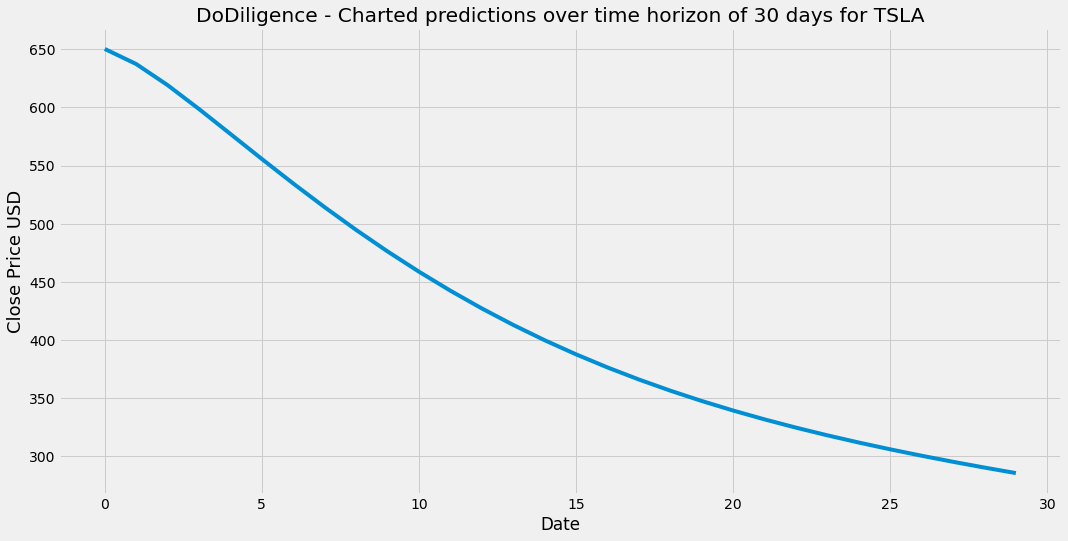

In [42]:
plt.figure(figsize=(16,8))
plt.title('DoDiligence - Charted predictions over time horizon of ' + str(days) + ' days for ' + stockpick)
plt.xlabel("Date")
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(scaler.inverse_transform(pred_output))
plt.show()


Thank you for using DoDiligence, and we hope you have found our stock prediction application helpful and interesting!

*Disclaimer: We are not financial advisors and this application is not advised to be used as financial advice. This application is built and only intended to be used for deep learning educational purposes.*